In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import re
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
import random

In [ ]:
upload = files.upload()
df = pd.read_csv('/content/uspto.govt.reliance.statistics.csv')

Saving uspto.govt.reliance.statistics.csv to uspto.govt.reliance.statistics.csv


In [ ]:
uploaded = files.upload()
federal_owned = pd.read_stata('/content/federal_funded.dta')

Saving federal_funded.dta to federal_funded.dta


In [ ]:
uploaded = files.upload()
total = pd.read_stata('/content/total_patent.dta')

Saving total_patent.dta to total_patent.dta


In [ ]:
federal_owned.tail()

,grantyear,cpc_a,cpc_b,cpc_c,cpc_d,cpc_e,cpc_f,cpc_g,cpc_h
87,2013,80.0,119.0,132.0,4.0,6.0,115.0,277.0,149.0
88,2014,85.0,115.0,144.0,6.0,1.0,92.0,250.0,159.0
89,2015,81.0,114.0,145.0,5.0,5.0,94.0,219.0,175.0
90,2016,61.0,102.0,119.0,2.0,4.0,77.0,215.0,173.0
91,2017,66.0,81.0,153.0,4.0,3.0,93.0,216.0,185.0


In [ ]:
cpc_columns = ['cpc_a', 'cpc_b', 'cpc_c', 'cpc_d', 'cpc_e', 'cpc_f', 'cpc_g', 'cpc_h']

# Calculate the sum of the CPC columns for each year
total['total_cpc'] = total[cpc_columns].sum(axis=1)

# Normalize each CPC column by the total sum for its year
for col in cpc_columns:
    total[col] = total[col] / total['total_cpc']
    federal_owned[col] = federal_owned[col] / total['total_cpc']

# Drop the total_cpc column if it's no longer needed
total.drop(columns=['total_cpc'], inplace=True)

In [ ]:
total.tail()

,grantyear,cpc_a,cpc_b,cpc_c,cpc_d,cpc_e,cpc_f,cpc_g,cpc_h
87,2013,0.143527,0.132293,0.082036,0.003952,0.021019,0.057448,0.301374,0.258351
88,2014,0.142525,0.127223,0.079221,0.003991,0.021678,0.057752,0.295512,0.272099
89,2015,0.137773,0.127389,0.079814,0.003761,0.022538,0.061062,0.285370,0.282294
90,2016,0.134998,0.120037,0.077078,0.003936,0.022654,0.061106,0.284315,0.295876
91,2017,0.132730,0.114593,0.076712,0.004286,0.022511,0.066947,0.278241,0.303980


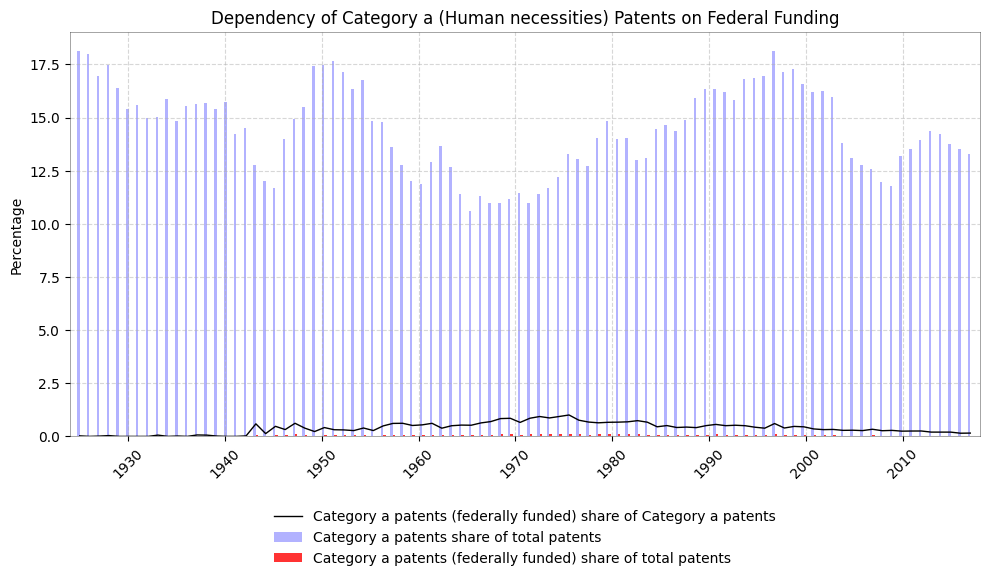

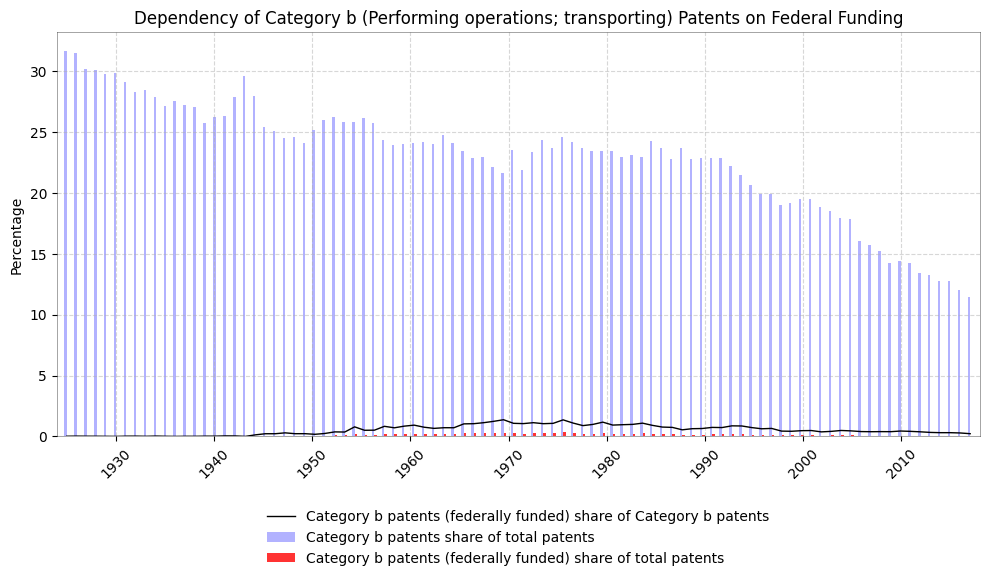

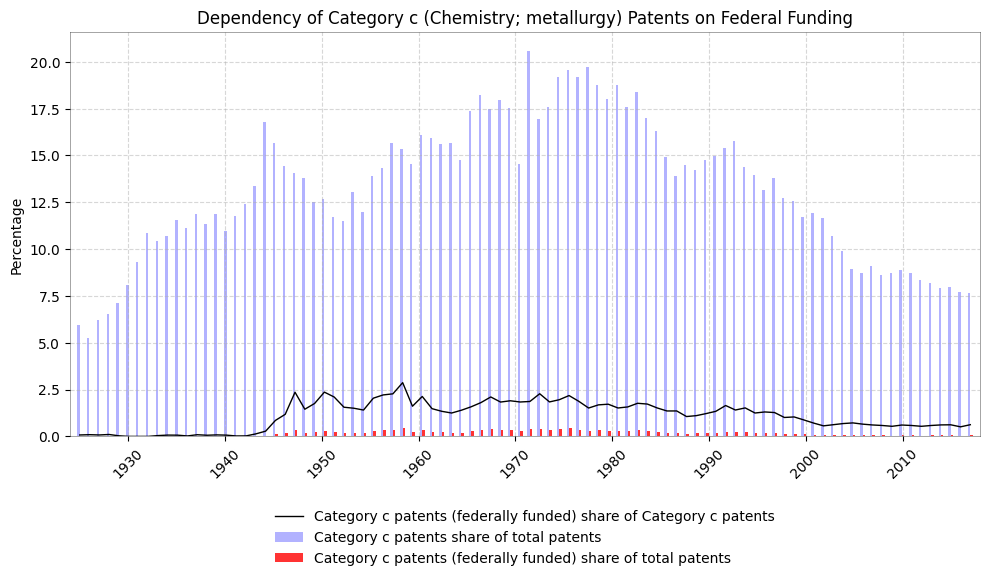

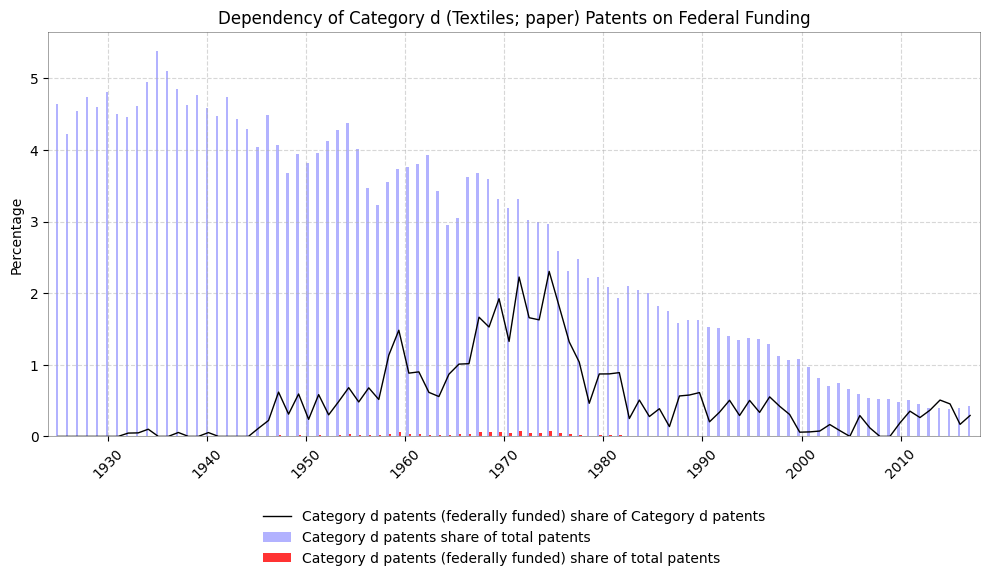

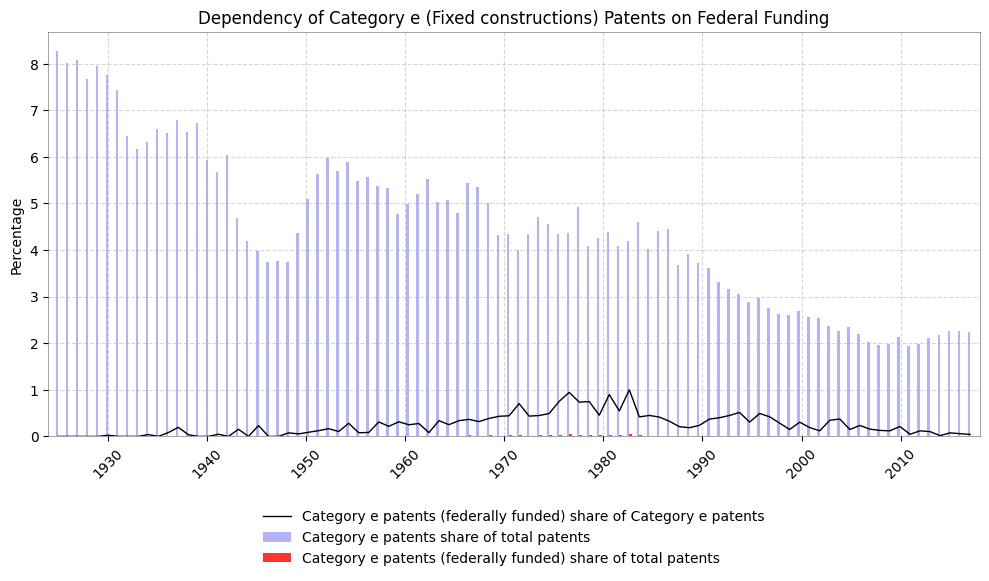

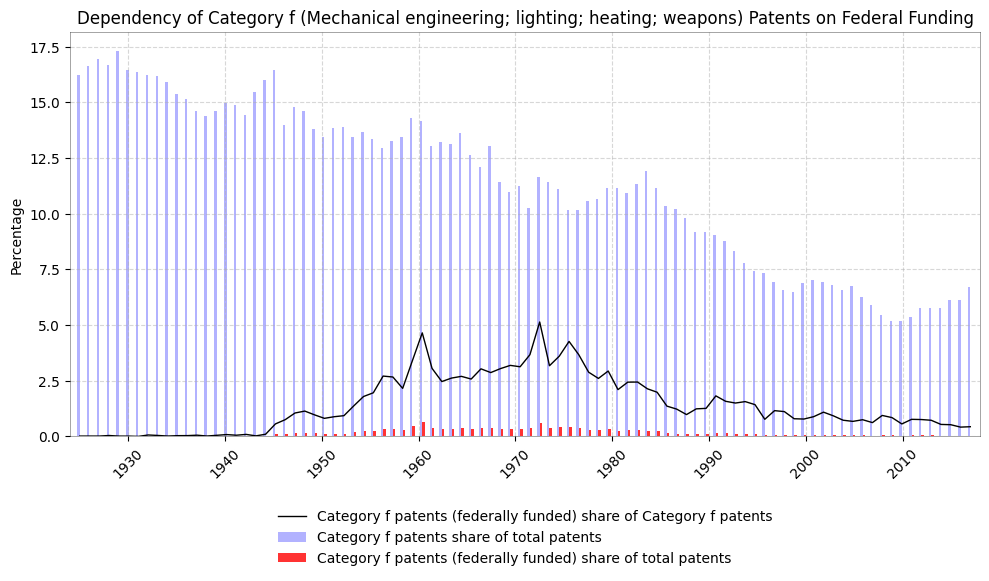

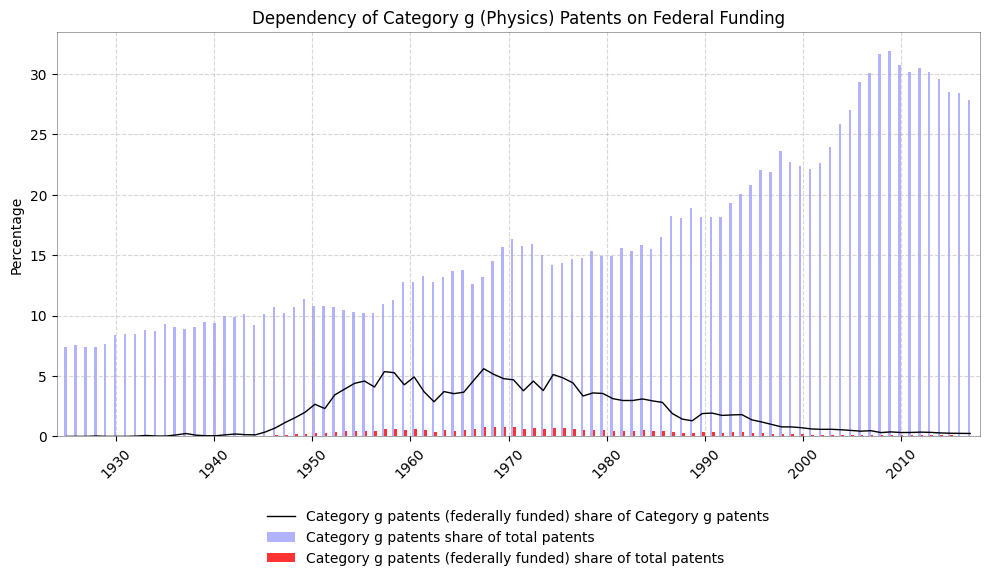

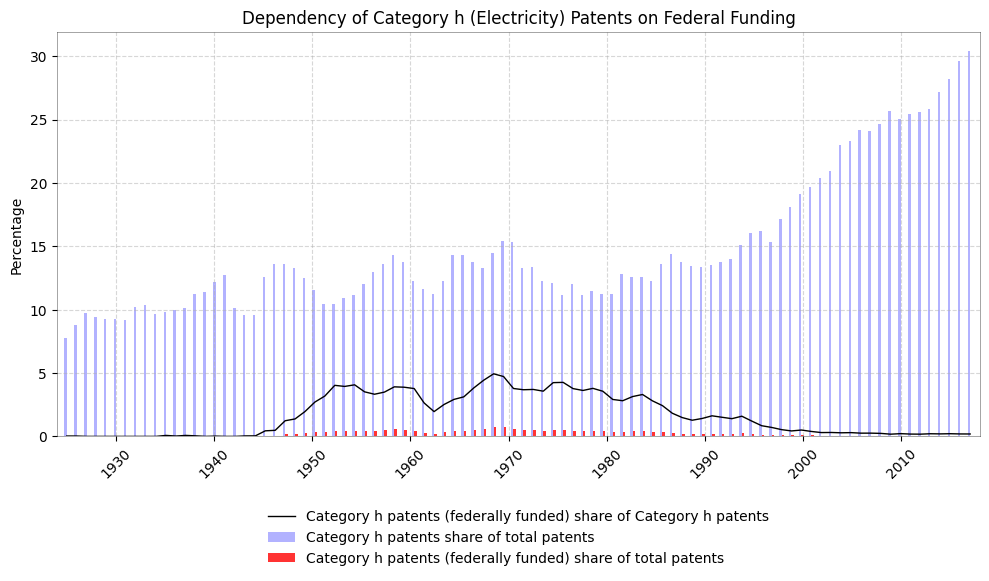

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Category names mapped to their letters
categories = {
    'a': 'Human necessities',
    'b': 'Performing operations; transporting',
    'c': 'Chemistry; metallurgy',
    'd': 'Textiles; paper',
    'e': 'Fixed constructions',
    'f': 'Mechanical engineering; lighting; heating; weapons',
    'g': 'Physics',
    'h': 'Electricity'
}

def plot_category(category_letter, category_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of bars/groups
    n_bars = len(total.index)

    # Locations for the groups
    index = np.linspace(1925, 2017, n_bars)

    # Width of each bar
    bar_width = (index[1] - index[0]) * 0.25

    # Plotting the bars for total and federally funded patents in the category
    bars1 = ax.bar(index - bar_width / 2, total[f'cpc_{category_letter}'] * 100, bar_width, color='blue', alpha=0.3, label=f'Category {category_letter} patents share of total patents')
    bars2 = ax.bar(index + bar_width / 2, federal_owned[f'cpc_{category_letter}'] * 100, bar_width, color='red', alpha=0.8, label=f'Category {category_letter} patents (federally funded) share of total patents')

    # Calculating and plotting the ratio line
    ratio = federal_owned[f'cpc_{category_letter}'] * 100 / total[f'cpc_{category_letter}']
    ax.plot(index, ratio, color='black', linestyle='-', linewidth=1, markersize=2, label=f'Category {category_letter} patents (federally funded) share of Category {category_letter} patents')

    # Title, labels, and customization
    plt.title(f'Dependency of Category {category_letter} ({category_name}) Patents on Federal Funding', fontsize=12)
    ax.set_ylabel('Percentage')

    # X-ticks and labels
    tick_positions = range(1920, 2021, 10)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_positions, rotation=45)

    # X-axis limits
    plt.xlim(1924, 2018)

    # Grid and spine customization
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
        spine.set_alpha(0.5)

    # Legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

    # Show the plot
    plt.tight_layout()
    #plt.savefig(f'{category_letter}.png', dpi=300)
    plt.show()
    #files.download(f'{category_letter}.png')

# Loop through all categories and plot
for category_letter, category_name in categories.items():
    plot_category(category_letter, category_name)


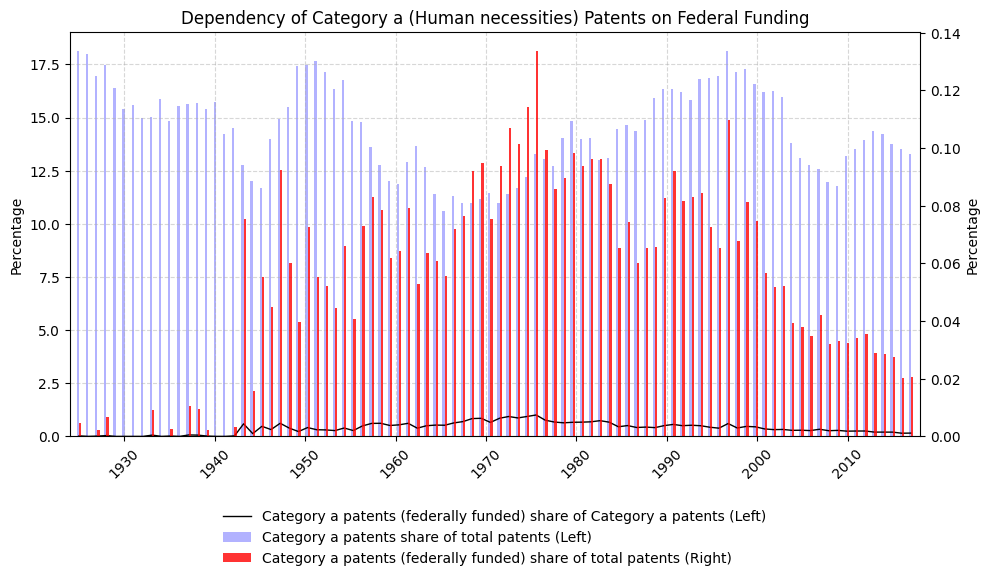

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

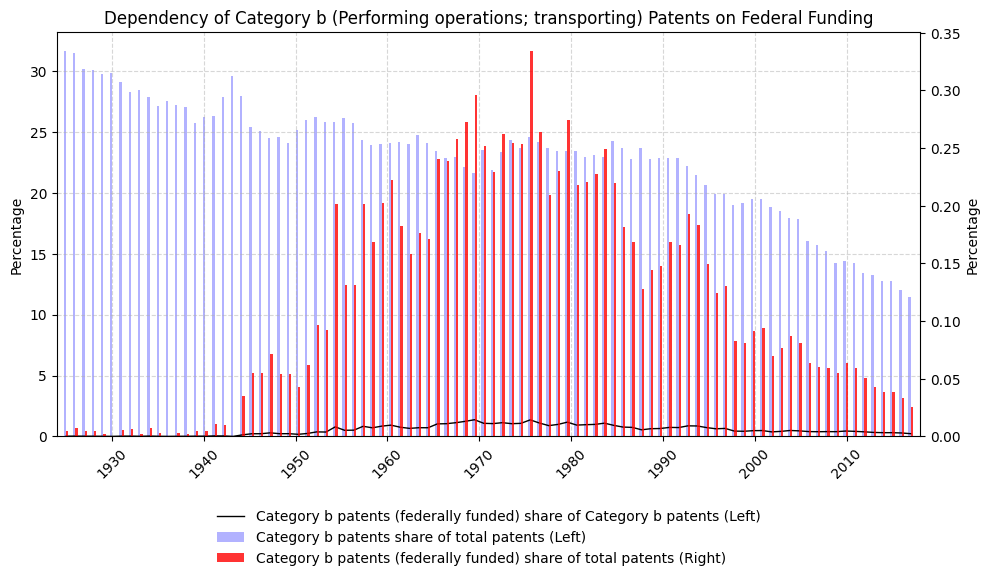

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

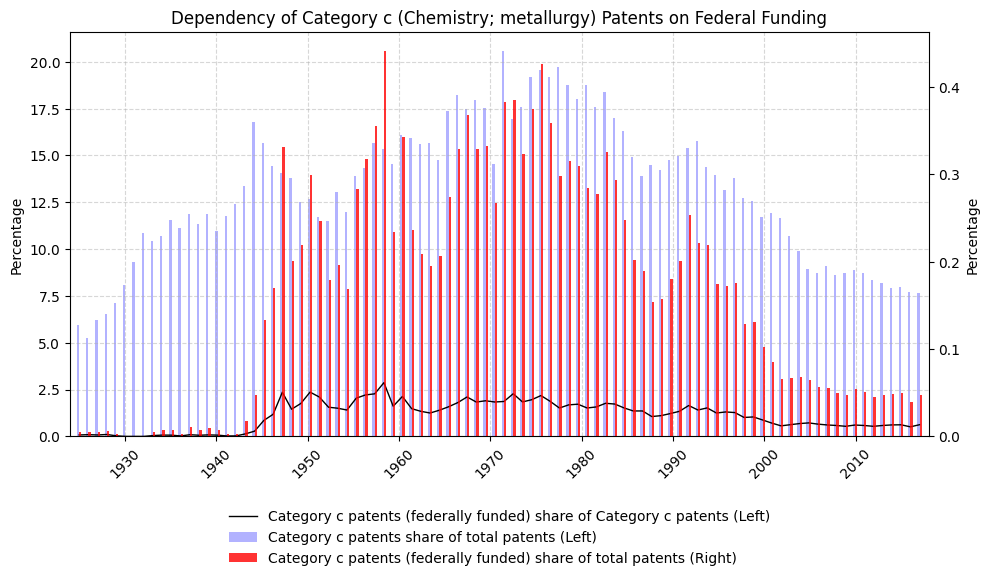

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

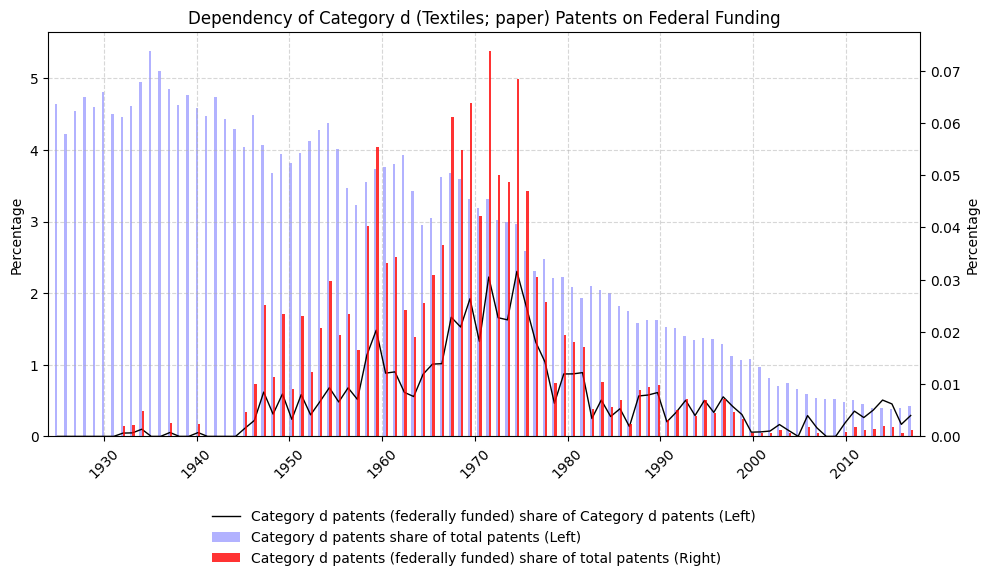

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

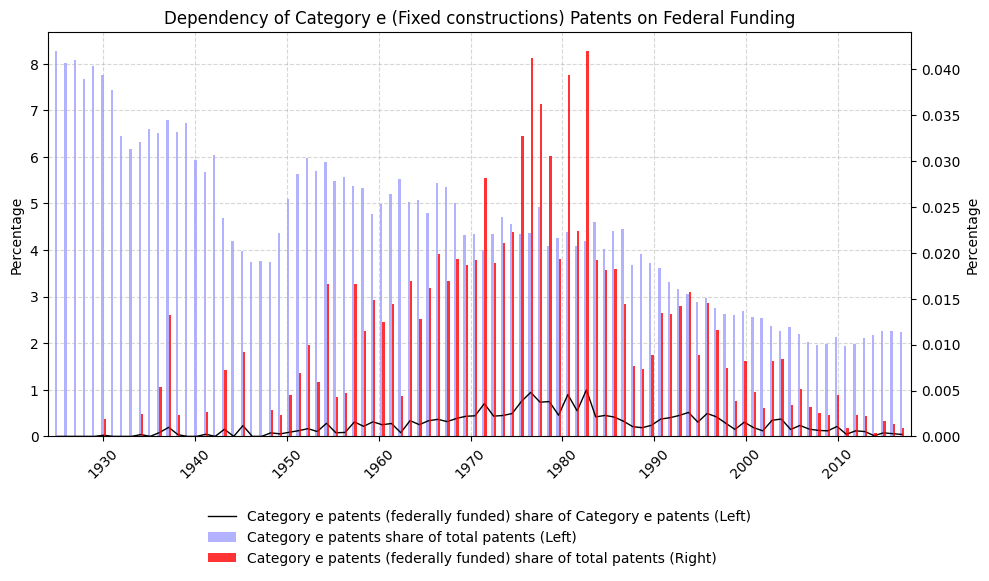

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

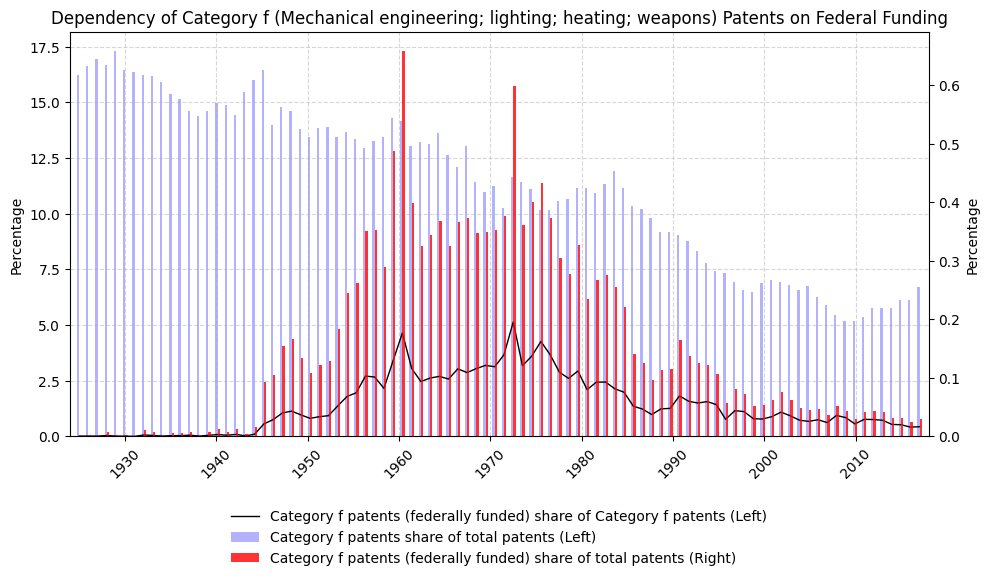

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

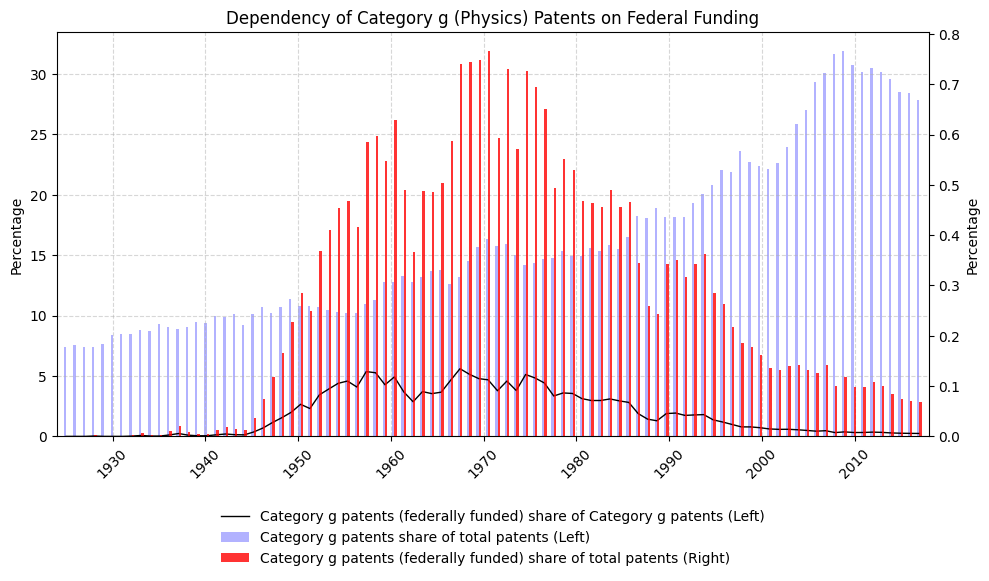

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

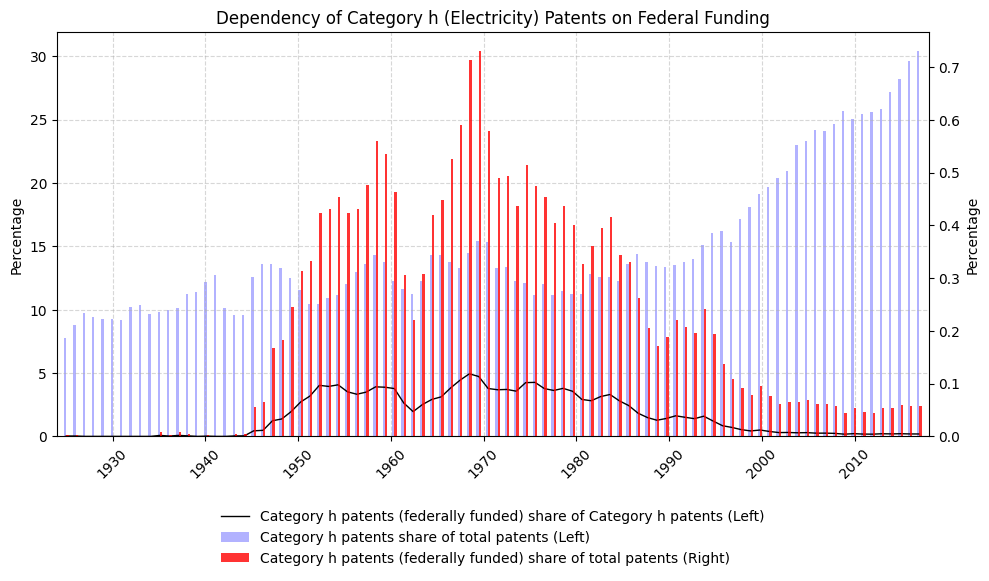

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Category names mapped to their letters
categories = {
    'a': 'Human necessities',
    'b': 'Performing operations; transporting',
    'c': 'Chemistry; metallurgy',
    'd': 'Textiles; paper',
    'e': 'Fixed constructions',
    'f': 'Mechanical engineering; lighting; heating; weapons',
    'g': 'Physics',
    'h': 'Electricity'
}

def plot_category(category_letter, category_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of bars/groups
    n_bars = len(total.index)

    # Locations for the groups
    index = np.linspace(1925, 2017, n_bars)

    # Width of each bar
    bar_width = (index[1] - index[0]) * 0.25

    # Plotting the blue bars (using the left y-axis)
    bars1 = ax.bar(index - bar_width / 2, total[f'cpc_{category_letter}'] * 100, bar_width, color='blue', alpha=0.3, label=f'Category {category_letter} patents share of total patents (Left)')

    # Creating a secondary y-axis for the red bars
    ax2 = ax.twinx()
    bars2 = ax2.bar(index + bar_width / 2, federal_owned[f'cpc_{category_letter}'] * 100, bar_width, color='red', alpha=0.8, label=f'Category {category_letter} patents (federally funded) share of total patents (Right)')

    # Calculating and plotting the ratio line (still on the primary y-axis)
    ratio = federal_owned[f'cpc_{category_letter}'] * 100 / total[f'cpc_{category_letter}']
    line1, = ax.plot(index, ratio, color='black', linestyle='-', linewidth=1, markersize=2, label=f'Category {category_letter} patents (federally funded) share of Category {category_letter} patents (Left)')

    # Title, labels, and customization
    plt.title(f'Dependency of Category {category_letter} ({category_name}) Patents on Federal Funding', fontsize=12)
    ax.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')

    # X-ticks and labels
    tick_positions = range(1920, 2021, 10)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_positions, rotation=45)

    # X-axis limits
    plt.xlim(1924, 2018)

    # Grid and spine customization
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
        spine.set_alpha(0.5)

    # Combining the legends into a single legend
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles1 + handles2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{category_letter}.png', dpi=300)
    plt.show()
    files.download(f'{category_letter}.png')

# Loop through all categories and plot
for category_letter, category_name in categories.items():
    plot_category(category_letter, category_name)


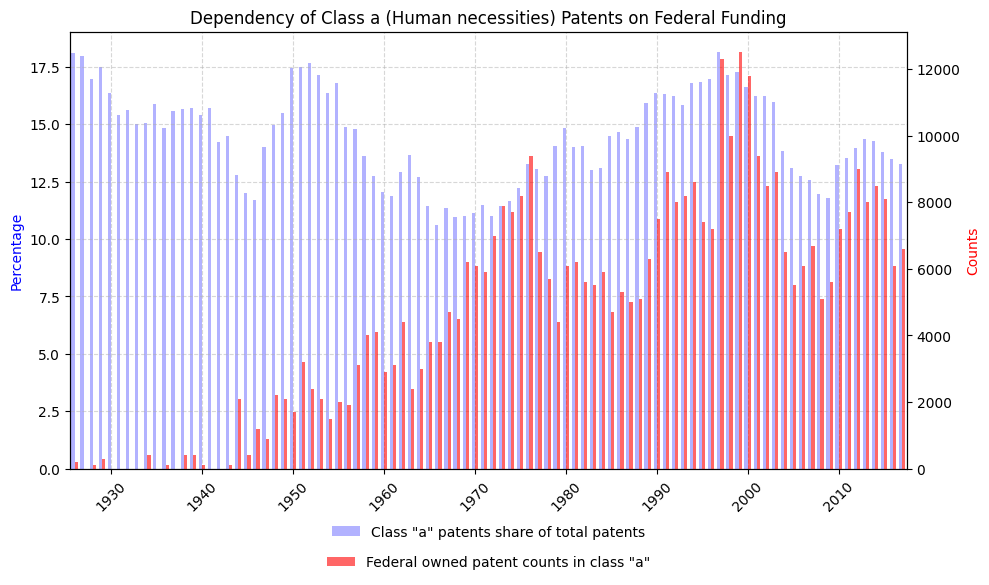

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

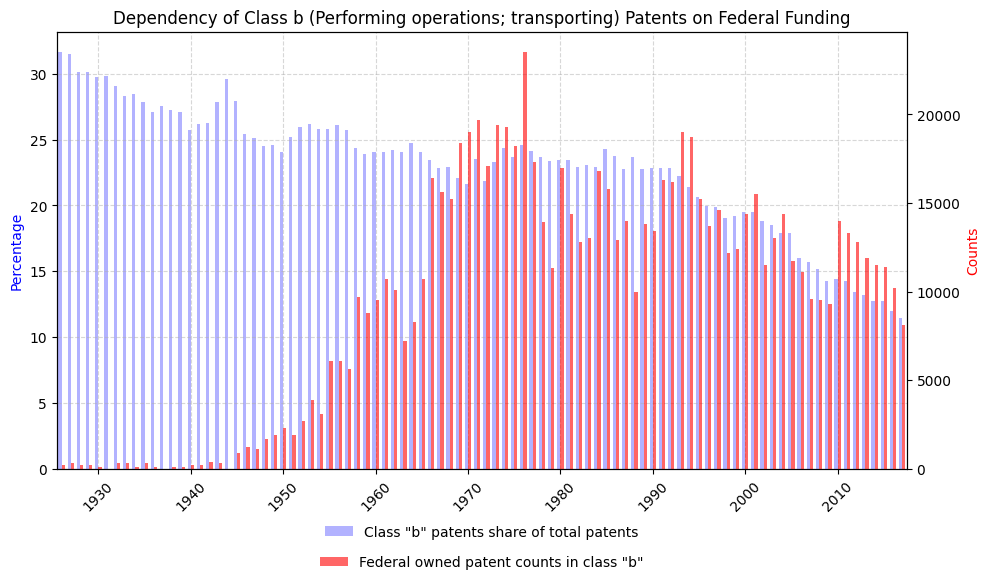

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

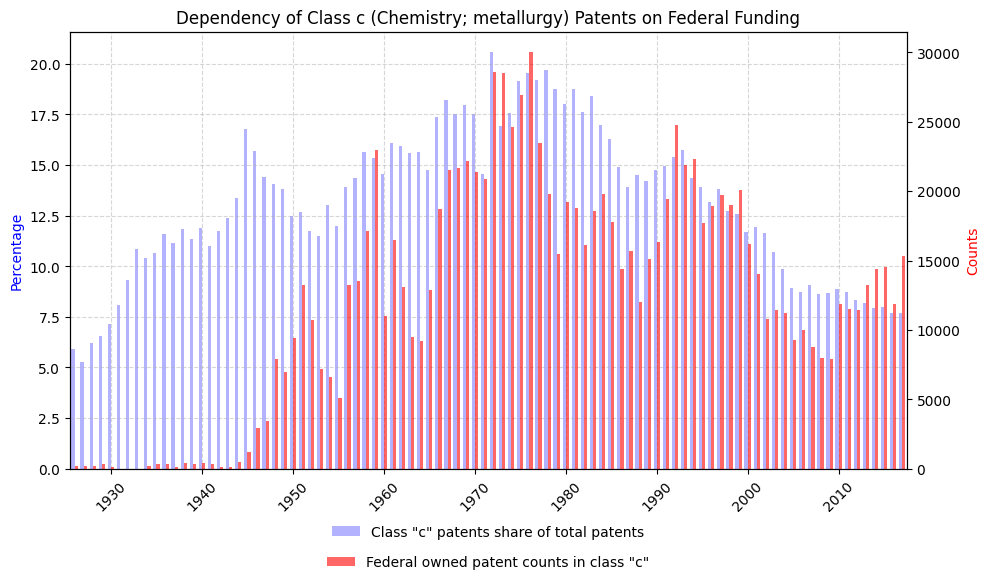

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

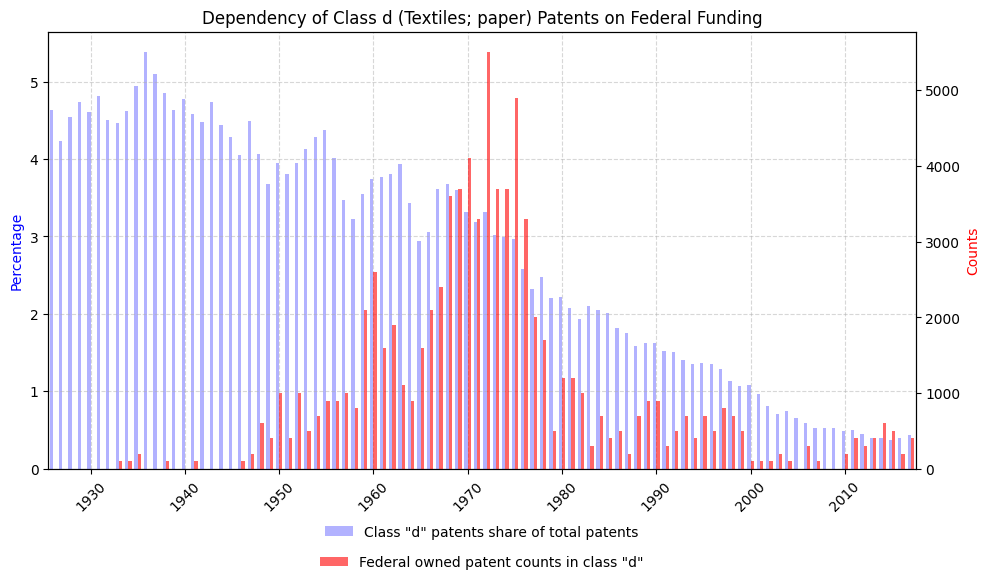

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

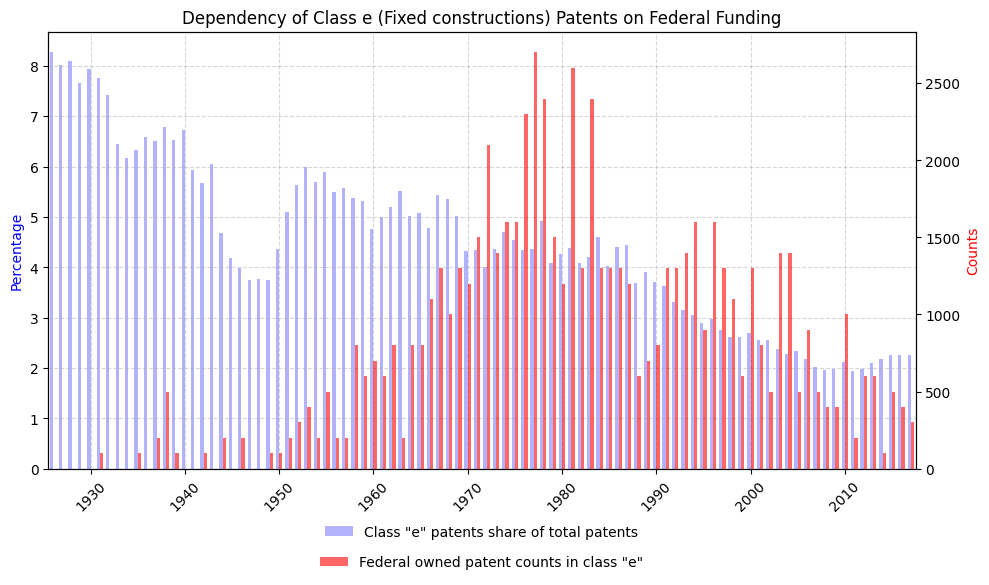

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

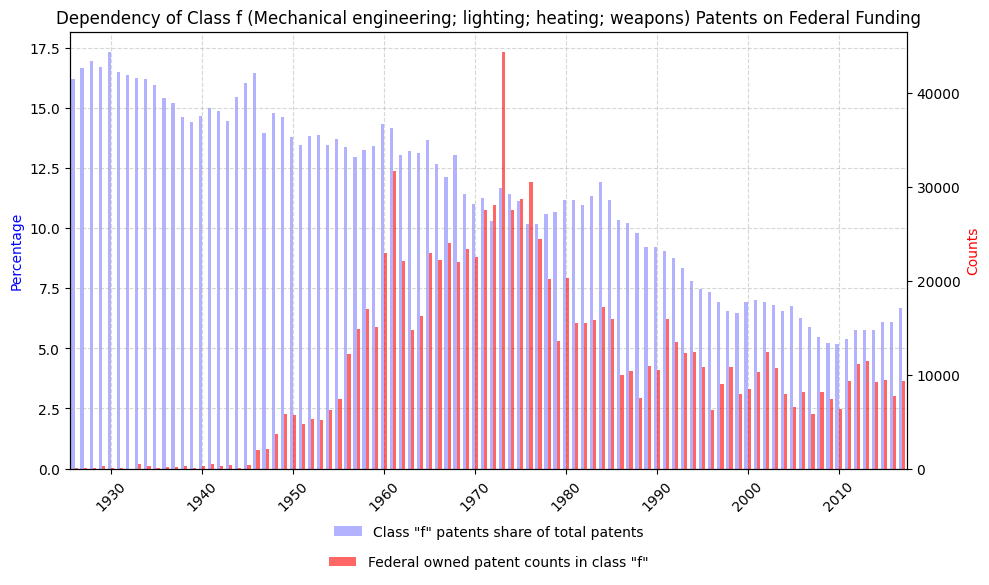

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

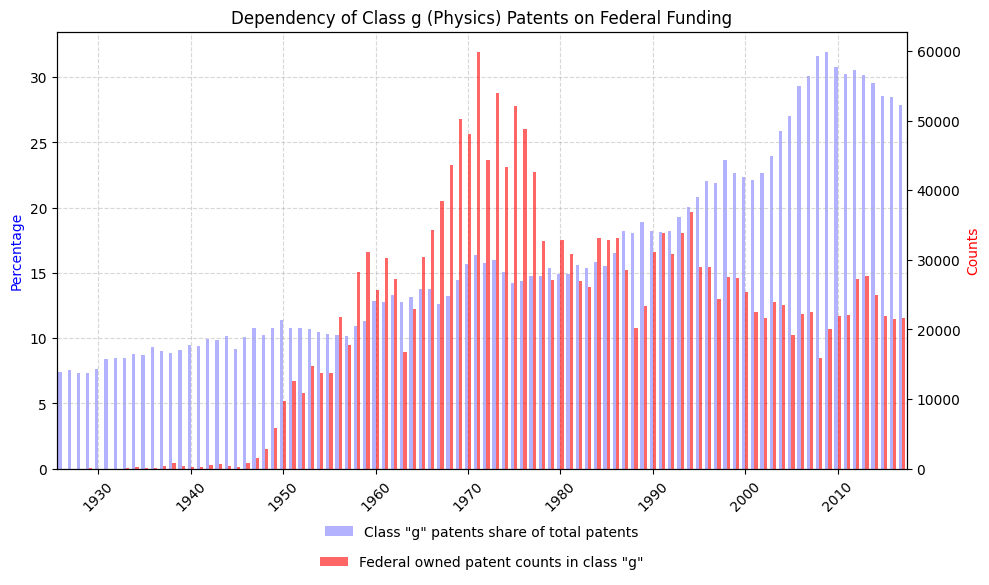

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

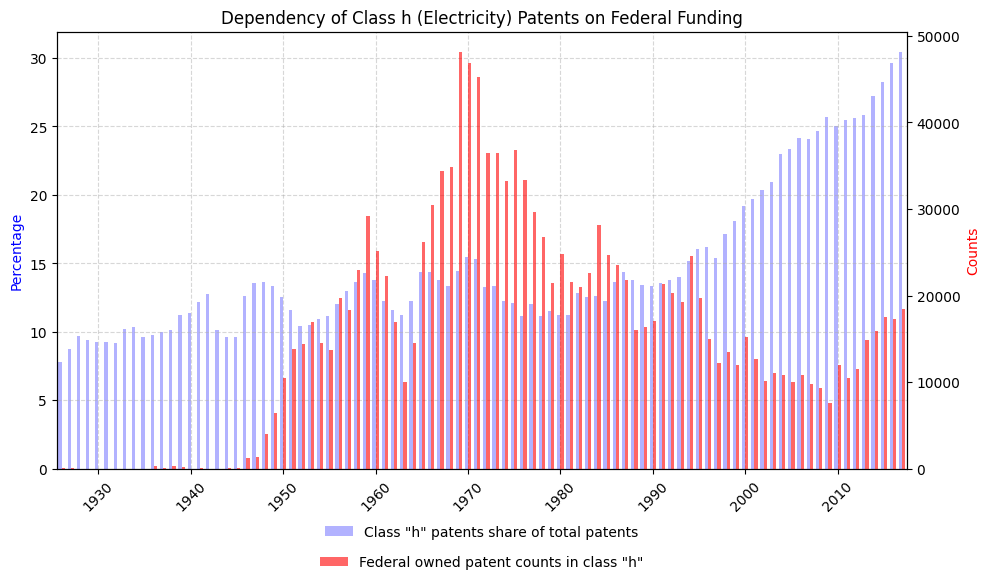

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Category names mapped to their letters
categories = {
    'a': 'Human necessities',
    'b': 'Performing operations; transporting',
    'c': 'Chemistry; metallurgy',
    'd': 'Textiles; paper',
    'e': 'Fixed constructions',
    'f': 'Mechanical engineering; lighting; heating; weapons',
    'g': 'Physics',
    'h': 'Electricity'
}

def plot_category(category_letter, category_name, total, federal_owned):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Number of bars/groups
    n_bars = len(total.index)

    # Locations for the groups
    index = np.arange(n_bars)

    # Width of each bar
    bar_width = 0.35

    # Plotting the bars for total patents in the category
    bars1 = ax1.bar(index - bar_width / 2, total[f'cpc_{category_letter}'] * 100, bar_width, color='blue', alpha=0.3, label=f'Class "{category_letter}" patents share of total patents')

    # Create second y-axis for federally owned patents
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width / 2, federal_owned[f'cpc_{category_letter}'] * 100, bar_width, color='red', alpha=0.6, label=f'Federal owned patent counts in class "{category_letter}"')

    # Title and labels
    ax1.set_title(f'Dependency of Class {category_letter} ({category_name}) Patents on Federal Funding', fontsize=12)
    ax1.set_xlabel('')
    ax1.set_ylabel('Percentage', color='blue')
    ax2.set_ylabel('Counts', color='red')

    # X-ticks and labels
    years = total['grantyear'].values
    tick_positions = np.arange(n_bars)
    major_tick_positions = [pos for pos, year in zip(tick_positions, years) if year % 10 == 0]

    ax1.set_xticks(major_tick_positions)  # Set major ticks where labels are needed
    ax1.set_xticklabels([year for year in years if year % 10 == 0], rotation=45)  # Only years divisible by 10

    # Grid and customization
    ax1.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
    ax1.grid(True, which='major', axis='x', linestyle='--', alpha=0.5)
    ax1.set_xticks(major_tick_positions, minor=False)  # Ensure x-axis grid lines align with major ticks
    ax1.set_xlim(left=max(0, np.min(tick_positions[years >= 1925])) - 0.5, right=np.max(tick_positions[years <= 2017]) + 0.5)

    # Legend
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=1)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), frameon=False, ncol=1)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{category_letter}.png', dpi=300)
    plt.show()
    files.download(f'{category_letter}.png')


for category_letter, category_name in categories.items():
    plot_category(category_letter, category_name, total, federal_owned)


# results on 9 april

In [ ]:
df.columns

Index(['Y', 'NUM_US', 'NUM_US_SUPPORTED_BY_US_GOVT', 'NUM_FOREIGN',
       'NUM_FOREIGN_SUPPORTED_BY_US_GOVT', 'NUM_US.1',
       'NUM_TOTAL_SUPPORTED_BY_US_GOVT', 'PERCENTAGE_US_SUPPORTED_BY_US_GOVT',
       'PERCENTAGE_FOREIGN_SUPPORTED_BY_US_GOVT',
       'PERCENTAGE_TOTAL_SUPPORTED_BY_US_GOVT', 'DOD', 'DOE', 'NASA', 'NSF',
       'HHS', 'USDA', 'OTHERS', 'AGENCY_UNSPECIFIED', 'DOD_RAW_COUNT',
       'DOE_RAW_COUNT', 'NASA_RAW_COUNT', 'NSF_RAW_COUNT', 'HHS_RAW_COUNT',
       'USDA_RAW_COUNT', 'OTHERS_RAW_COUNT', 'AGENCY_UNSPECIFIED_RAW_COUNT',
       'ENTITY_MICRO', 'ENTITY_SMALL', 'ENTITY_LARGE', 'ENTITY_UNKNOWN',
       'ENTITY_MICRO_RAW_COUNT', 'ENTITY_SMALL_RAW_COUNT',
       'ENTITY_LARGE_RAW_COUNT', 'ENTITY_UNKNOWN_RAW_COUNT', 'CPC_A', 'CPC_B',
       'CPC_C', 'CPC_D', 'CPC_E', 'CPC_F', 'CPC_G', 'CPC_H', 'CPC_UNKNOWN',
       'CPC_A_RAW_COUNT', 'CPC_B_RAW_COUNT', 'CPC_C_RAW_COUNT',
       'CPC_D_RAW_COUNT', 'CPC_E_RAW_COUNT', 'CPC_F_RAW_COUNT',
       'CPC_G_RAW_COUNT', 'CPC_H

In [ ]:
df_new = df[['Y', 'NUM_US', 'NUM_US_SUPPORTED_BY_US_GOVT', 'PERCENTAGE_US_SUPPORTED_BY_US_GOVT',
       'CPC_A_RAW_COUNT', 'CPC_B_RAW_COUNT', 'CPC_C_RAW_COUNT',
       'CPC_D_RAW_COUNT', 'CPC_E_RAW_COUNT', 'CPC_F_RAW_COUNT',
       'CPC_G_RAW_COUNT', 'CPC_H_RAW_COUNT', 'CPC_UNKNOWN_RAW_COUNT',
       'CPC_A_RAW_COUNT_TOTAL', 'CPC_B_RAW_COUNT_TOTAL',
       'CPC_C_RAW_COUNT_TOTAL', 'CPC_D_RAW_COUNT_TOTAL',
       'CPC_E_RAW_COUNT_TOTAL', 'CPC_F_RAW_COUNT_TOTAL',
       'CPC_G_RAW_COUNT_TOTAL', 'CPC_H_RAW_COUNT_TOTAL',
       'CPC_UNKNOWN_RAW_COUNT_TOTAL']]
df_new.set_index('Y', inplace=True)
df_new.head()

,NUM_US,NUM_US_SUPPORTED_BY_US_GOVT,PERCENTAGE_US_SUPPORTED_BY_US_GOVT,CPC_A_RAW_COUNT,CPC_B_RAW_COUNT,CPC_C_RAW_COUNT,CPC_D_RAW_COUNT,CPC_E_RAW_COUNT,CPC_F_RAW_COUNT,CPC_G_RAW_COUNT,...,CPC_UNKNOWN_RAW_COUNT,CPC_A_RAW_COUNT_TOTAL,CPC_B_RAW_COUNT_TOTAL,CPC_C_RAW_COUNT_TOTAL,CPC_D_RAW_COUNT_TOTAL,CPC_E_RAW_COUNT_TOTAL,CPC_F_RAW_COUNT_TOTAL,CPC_G_RAW_COUNT_TOTAL,CPC_H_RAW_COUNT_TOTAL,CPC_UNKNOWN_RAW_COUNT_TOTAL
Y,,,,,,,,,,,,,,,,,,,,,
1926,40986,82,0.0020,8,18,13,0,1,31,7,...,1,7505,12953,2304,1841,3504,6502,2923,3208,246
1927,38268,92,0.0024,11,22,12,1,1,33,6,...,2,6986,12033,1931,1548,3165,6248,2783,3345,229
1928,38753,83,0.0021,10,10,8,0,2,37,7,...,5,6657,11708,2233,1652,3243,6502,2766,3785,207
1929,41183,99,0.0024,11,19,15,0,1,33,12,...,3,7362,12447,2540,1849,3277,6747,2939,3800,222
1930,41064,116,0.0028,11,24,24,3,1,37,12,...,0,6895,12223,2730,1833,3443,6962,3013,3768,197


In [ ]:
columns_to_divide = [
    'CPC_A_RAW_COUNT', 'CPC_B_RAW_COUNT', 'CPC_C_RAW_COUNT',
    'CPC_D_RAW_COUNT', 'CPC_E_RAW_COUNT', 'CPC_F_RAW_COUNT',
    'CPC_G_RAW_COUNT', 'CPC_H_RAW_COUNT', 'CPC_UNKNOWN_RAW_COUNT',
    'CPC_A_RAW_COUNT_TOTAL', 'CPC_B_RAW_COUNT_TOTAL',
    'CPC_C_RAW_COUNT_TOTAL', 'CPC_D_RAW_COUNT_TOTAL',
    'CPC_E_RAW_COUNT_TOTAL', 'CPC_F_RAW_COUNT_TOTAL',
    'CPC_G_RAW_COUNT_TOTAL', 'CPC_H_RAW_COUNT_TOTAL',
    'CPC_UNKNOWN_RAW_COUNT_TOTAL'
]

df_new[columns_to_divide] = df_new[columns_to_divide].div(df_new['NUM_US'], axis=0)
df_new.head()

<ipython-input-17-c379861d1c18>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[columns_to_divide] = df_new[columns_to_divide].div(df_new['NUM_US'], axis=0)


,NUM_US,NUM_US_SUPPORTED_BY_US_GOVT,PERCENTAGE_US_SUPPORTED_BY_US_GOVT,CPC_A_RAW_COUNT,CPC_B_RAW_COUNT,CPC_C_RAW_COUNT,CPC_D_RAW_COUNT,CPC_E_RAW_COUNT,CPC_F_RAW_COUNT,CPC_G_RAW_COUNT,...,CPC_UNKNOWN_RAW_COUNT,CPC_A_RAW_COUNT_TOTAL,CPC_B_RAW_COUNT_TOTAL,CPC_C_RAW_COUNT_TOTAL,CPC_D_RAW_COUNT_TOTAL,CPC_E_RAW_COUNT_TOTAL,CPC_F_RAW_COUNT_TOTAL,CPC_G_RAW_COUNT_TOTAL,CPC_H_RAW_COUNT_TOTAL,CPC_UNKNOWN_RAW_COUNT_TOTAL
Y,,,,,,,,,,,,,,,,,,,,,
1926,40986,82,0.0020,0.000195,0.000439,0.000317,0.000000,0.000024,0.000756,0.000171,...,0.000024,0.183111,0.316035,0.056214,0.044918,0.085493,0.158640,0.071317,0.078271,0.006002
1927,38268,92,0.0024,0.000287,0.000575,0.000314,0.000026,0.000026,0.000862,0.000157,...,0.000052,0.182555,0.314440,0.050460,0.040452,0.082706,0.163270,0.072724,0.087410,0.005984
1928,38753,83,0.0021,0.000258,0.000258,0.000206,0.000000,0.000052,0.000955,0.000181,...,0.000129,0.171780,0.302119,0.057621,0.042629,0.083684,0.167781,0.071375,0.097670,0.005342
1929,41183,99,0.0024,0.000267,0.000461,0.000364,0.000000,0.000024,0.000801,0.000291,...,0.000073,0.178763,0.302236,0.061676,0.044897,0.079572,0.163830,0.071364,0.092271,0.005391
1930,41064,116,0.0028,0.000268,0.000584,0.000584,0.000073,0.000024,0.000901,0.000292,...,0.000000,0.167909,0.297657,0.066482,0.044638,0.083845,0.169540,0.073373,0.091759,0.004797


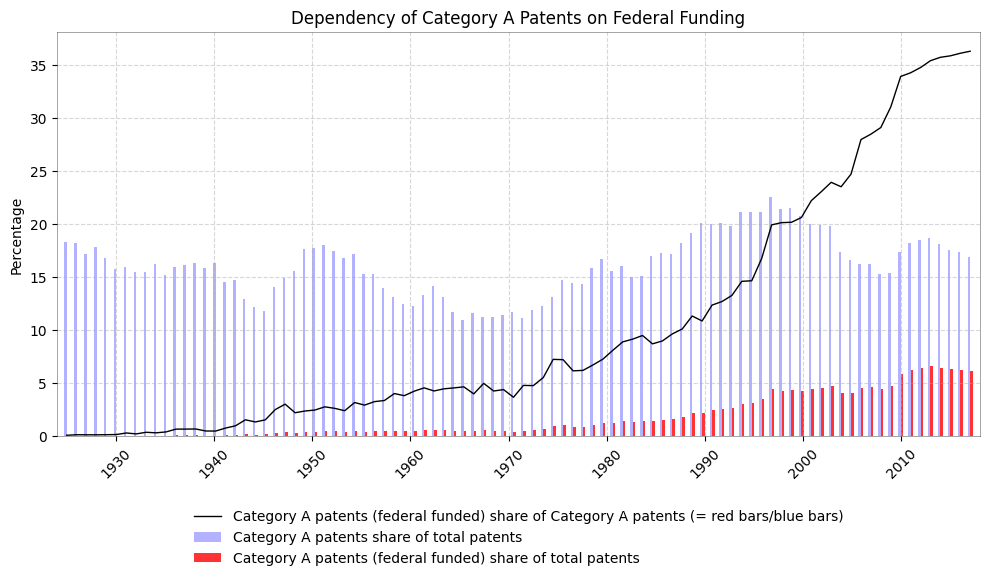

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Number of bars/groups
n_bars = len(df_new.index)

# Locations for the groups
index = np.linspace(1925, 2017, n_bars)  # Generate linearly spaced positions to match the range

# Width of each bar
bar_width = (index[1] - index[0]) * 0.25  # Calculate width based on spacing

# Plotting the bars
bars1 = ax.bar(index - bar_width / 2, df_new['CPC_A_RAW_COUNT_TOTAL'] * 100, bar_width, color='blue', alpha=0.3, label='Category A patents share of total patents')
bars2 = ax.bar(index + bar_width / 2, df_new['CPC_A_RAW_COUNT'] * 100, bar_width, color='red', alpha=0.8, label='Category A patents (federal funded) share of total patents')

ratio = df_new['CPC_A_RAW_COUNT'] * 100 / df_new['CPC_A_RAW_COUNT_TOTAL']

# Plotting the line
ax.plot(index, ratio, color='black', linestyle='-', linewidth=1, markersize=2, label='Category A patents (federal funded) share of Category A patents (= red bars/blue bars)')
plt.title('Dependency of Category A Patents on Federal Funding', fontsize=12)
ax.set_ylabel('Percentage')
# Setting x-ticks and labels for every 10 years from 1920 to 2020
tick_positions = range(1920, 2021, 10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

# Setting the x-axis limit from 1925 to 2017
plt.xlim(1924, 2018)

# Additional customizations
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

# Showing the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


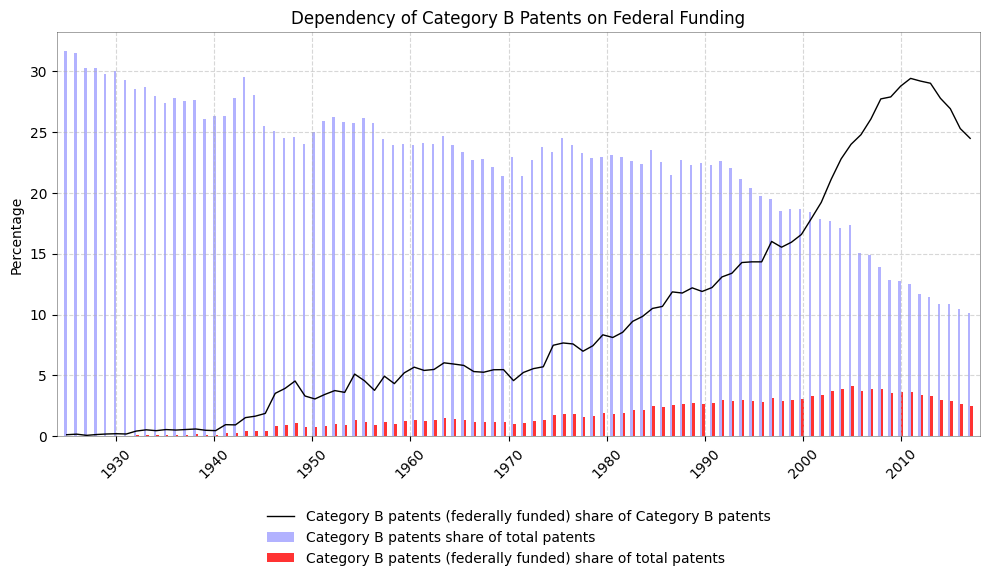

In [ ]:
category_letter = 'B'

fig, ax = plt.subplots(figsize=(10, 6))

# Number of bars/groups
n_bars = len(df_new.index)

# Locations for the groups
index = np.linspace(1925, 2017, n_bars)

# Width of each bar
bar_width = (index[1] - index[0]) * 0.25

# Plotting the bars for total and federally funded patents in the category
bars1 = ax.bar(index - bar_width / 2, df_new[f'CPC_{category_letter}_RAW_COUNT_TOTAL'] * 100, bar_width, color='blue', alpha=0.3, label=f'Category {category_letter} patents share of total patents')
bars2 = ax.bar(index + bar_width / 2, df_new[f'CPC_{category_letter}_RAW_COUNT'] * 100, bar_width, color='red', alpha=0.8, label=f'Category {category_letter} patents (federally funded) share of total patents')

# Calculating and plotting the ratio line
ratio = df_new[f'CPC_{category_letter}_RAW_COUNT'] * 100 / df_new[f'CPC_{category_letter}_RAW_COUNT_TOTAL']
ax.plot(index, ratio, color='black', linestyle='-', linewidth=1, markersize=2, label=f'Category {category_letter} patents (federally funded) share of Category {category_letter} patents')

# Title, labels, and customization
plt.title(f'Dependency of Category {category_letter} Patents on Federal Funding', fontsize=12)
ax.set_ylabel('Percentage')

# X-ticks and labels
tick_positions = range(1920, 2021, 10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=45)

# X-axis limits
plt.xlim(1924, 2018)

# Grid and spine customization
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='x', linestyle='--', alpha=0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

# Legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


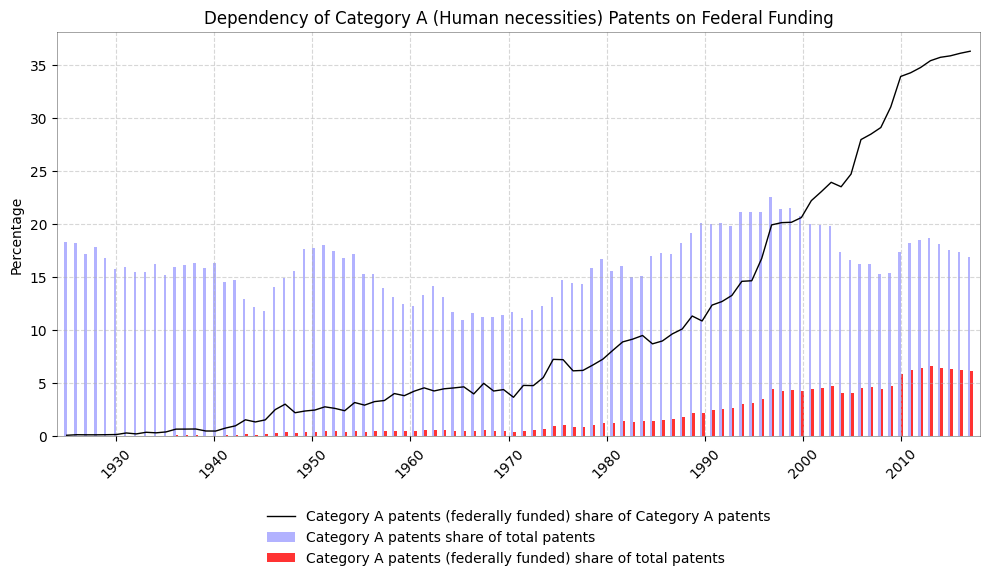

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

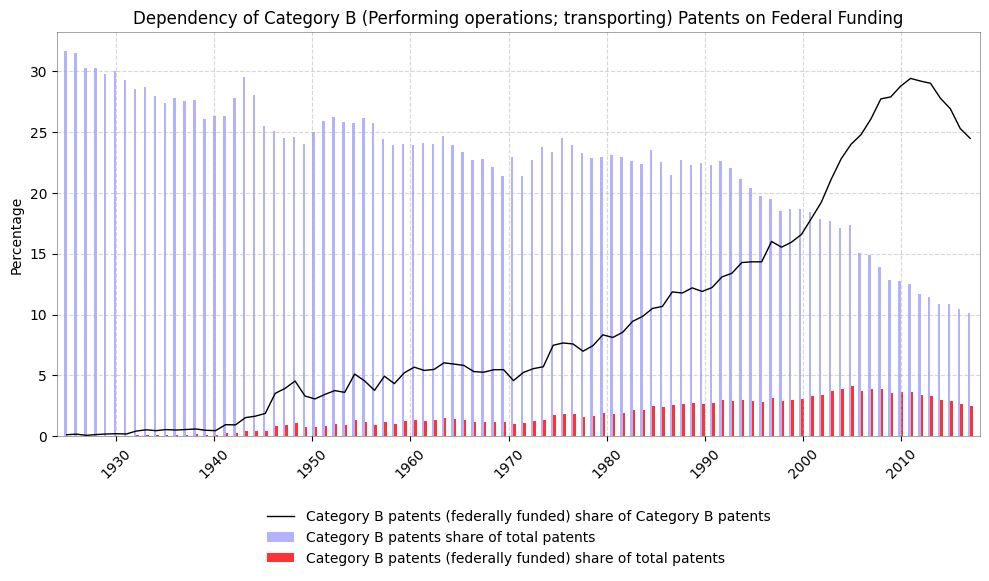

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

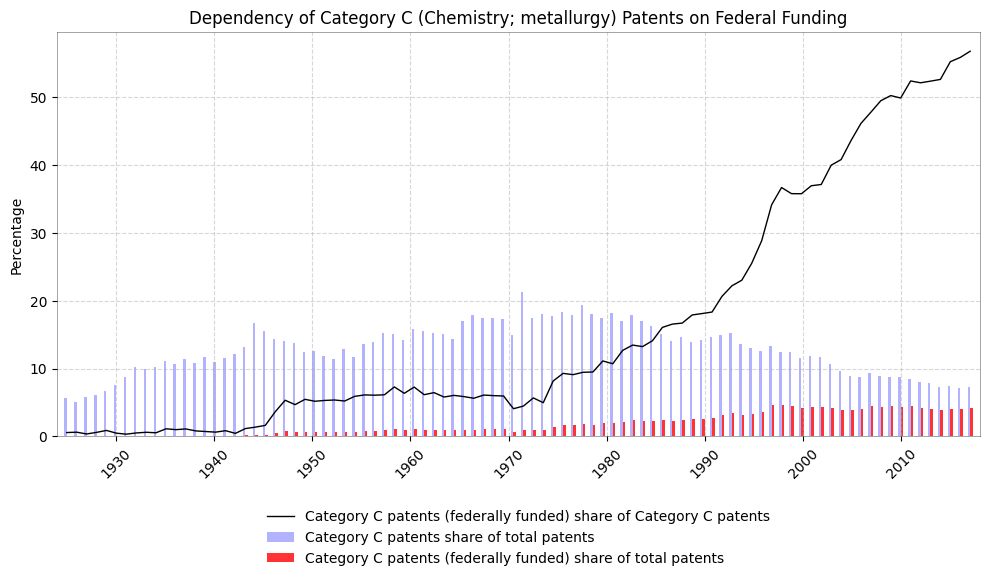

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

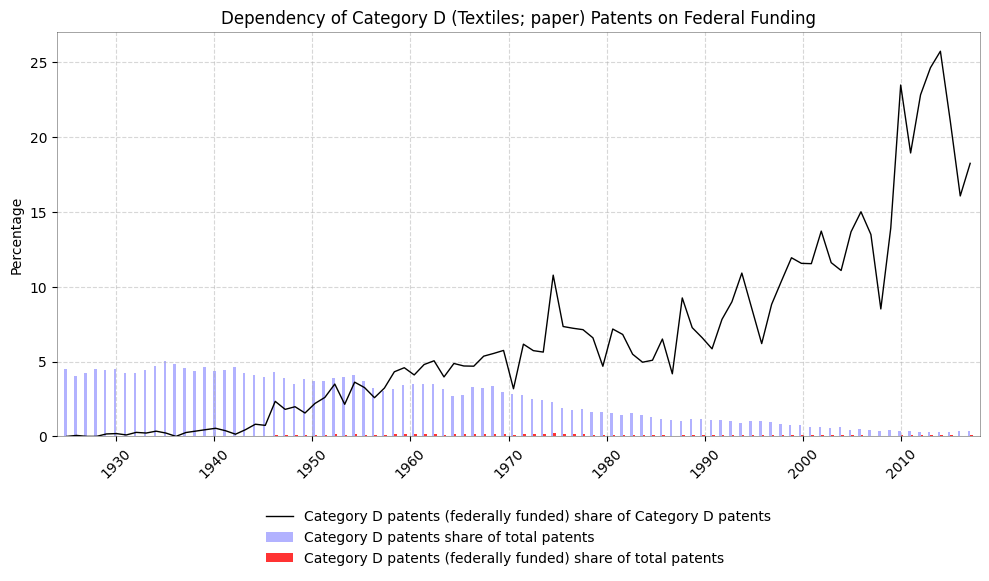

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

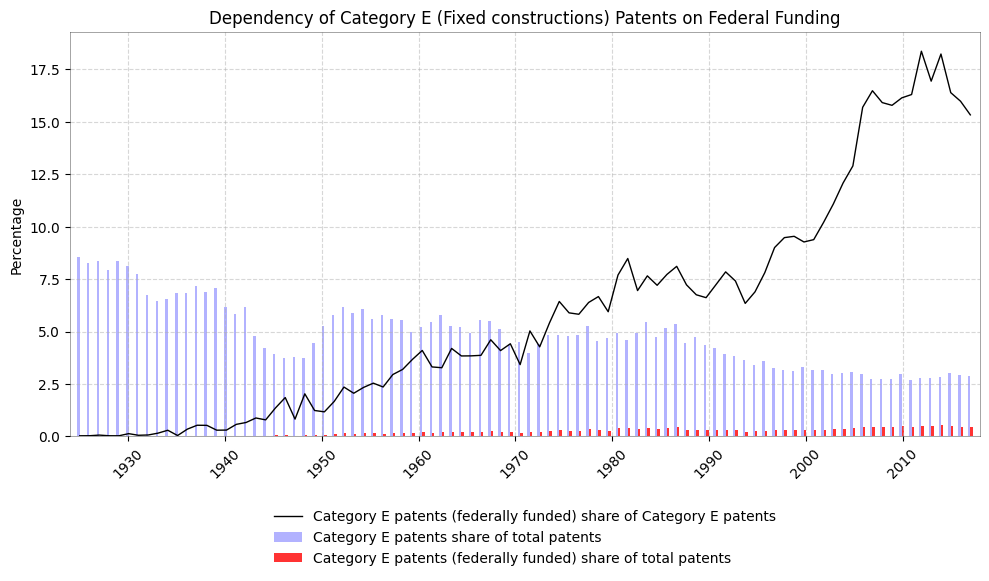

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

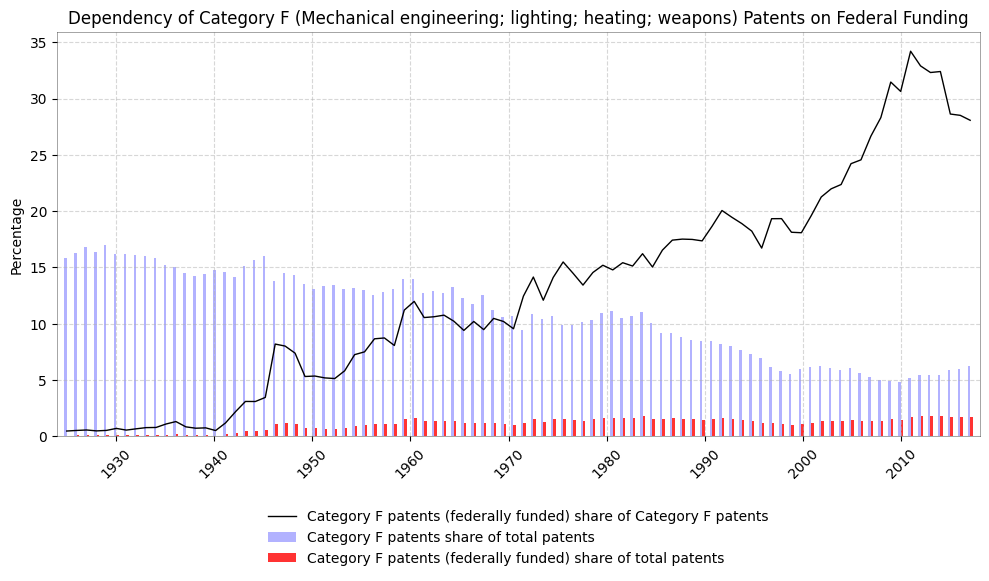

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

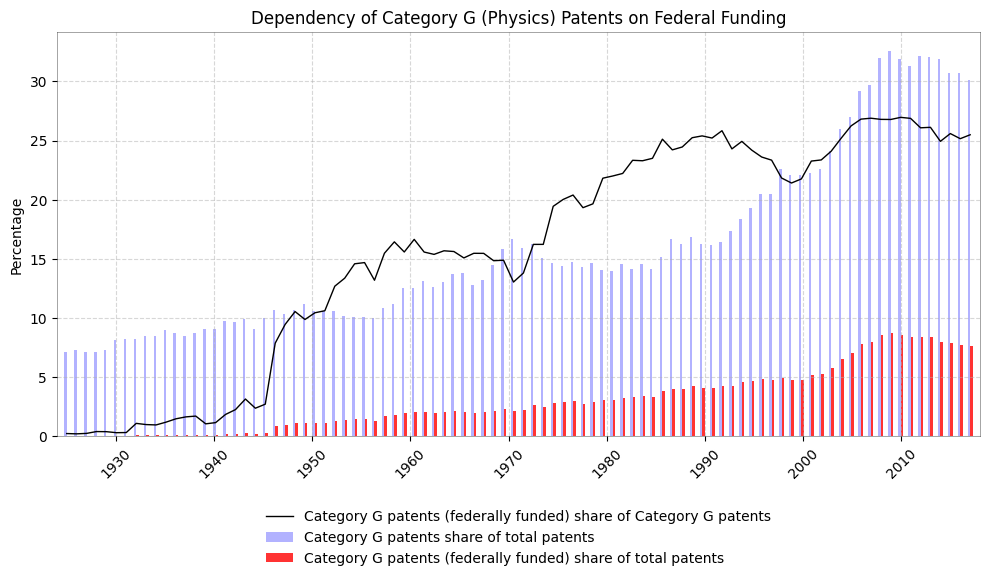

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

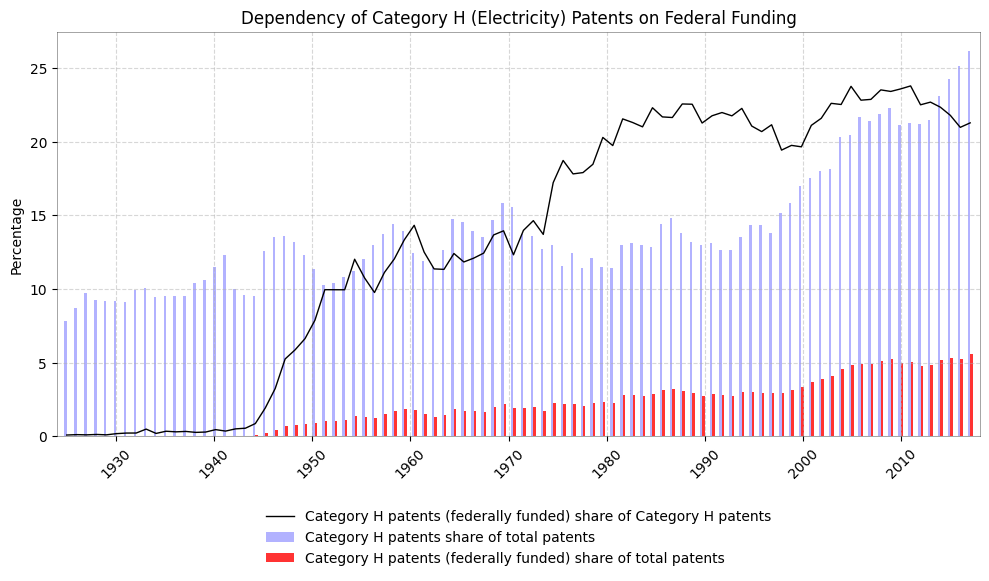

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Category names mapped to their letters
categories = {
    'A': 'Human necessities',
    'B': 'Performing operations; transporting',
    'C': 'Chemistry; metallurgy',
    'D': 'Textiles; paper',
    'E': 'Fixed constructions',
    'F': 'Mechanical engineering; lighting; heating; weapons',
    'G': 'Physics',
    'H': 'Electricity'
}

def plot_category(category_letter, category_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of bars/groups
    n_bars = len(df_new.index)

    # Locations for the groups
    index = np.linspace(1925, 2017, n_bars)

    # Width of each bar
    bar_width = (index[1] - index[0]) * 0.25

    # Plotting the bars for total and federally funded patents in the category
    bars1 = ax.bar(index - bar_width / 2, df_new[f'CPC_{category_letter}_RAW_COUNT_TOTAL'] * 100, bar_width, color='blue', alpha=0.3, label=f'Category {category_letter} patents share of total patents')
    bars2 = ax.bar(index + bar_width / 2, df_new[f'CPC_{category_letter}_RAW_COUNT'] * 100, bar_width, color='red', alpha=0.8, label=f'Category {category_letter} patents (federally funded) share of total patents')

    # Calculating and plotting the ratio line
    ratio = df_new[f'CPC_{category_letter}_RAW_COUNT'] * 100 / df_new[f'CPC_{category_letter}_RAW_COUNT_TOTAL']
    ax.plot(index, ratio, color='black', linestyle='-', linewidth=1, markersize=2, label=f'Category {category_letter} patents (federally funded) share of Category {category_letter} patents')

    # Title, labels, and customization
    plt.title(f'Dependency of Category {category_letter} ({category_name}) Patents on Federal Funding', fontsize=12)
    ax.set_ylabel('Percentage')

    # X-ticks and labels
    tick_positions = range(1920, 2021, 10)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_positions, rotation=45)

    # X-axis limits
    plt.xlim(1924, 2018)

    # Grid and spine customization
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.5)
        spine.set_alpha(0.5)

    # Legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{category_letter}.png', dpi=300)
    plt.show()
    files.download(f'{category_letter}.png')

# Loop through all categories and plot
for category_letter, category_name in categories.items():
    plot_category(category_letter, category_name)
